In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle

In [20]:
df = pd.read_csv("C:/Users/nilsm/MakeAIWork/projects/project1/csv_files/data_new_iqr.csv")

df.head()

,genetic,exercise,smoking,alcohol,sugar,bmi,lifespan
0,73.9,0.9,0.0,2.4,6.9,29.13,73.1
1,86.0,1.8,8.1,0.4,4.2,35.63,85.0
2,83.3,1.1,0.8,4.6,7.5,35.96,81.6
3,82.8,4.7,11.8,1.0,2.9,41.42,81.0
4,78.7,1.5,8.3,4.9,5.5,22.60,75.0


In [21]:
# create x and y
x = df.drop(columns='lifespan')
y = df['lifespan']

x.head()

,genetic,exercise,smoking,alcohol,sugar,bmi
0,73.9,0.9,0.0,2.4,6.9,29.13
1,86.0,1.8,8.1,0.4,4.2,35.63
2,83.3,1.1,0.8,4.6,7.5,35.96
3,82.8,4.7,11.8,1.0,2.9,41.42
4,78.7,1.5,8.3,4.9,5.5,22.60


In [22]:
y.head()

0    73.1
1    85.0
2    81.6
3    81.0
4    75.0
Name: lifespan, dtype: float64

In [23]:
# split the data 30% - 70%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
# apply linear regression
lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [25]:
# check the intercept
c = lr.intercept_

c

1.0995027005735238

In [26]:
# check the coef.
m = lr.coef_

m

array([ 1.00325566,  0.79653911, -0.26134334, -0.22338515, -0.07275067,
       -0.06499291])

In [27]:
# train the data
y_pred_train = lr.predict(x_train)

y_pred_train

array([86.74034441, 89.44635469, 98.38890611, ..., 73.42846654,
       85.27901677, 64.23622732])

<function matplotlib.pyplot.show(close=None, block=None)>

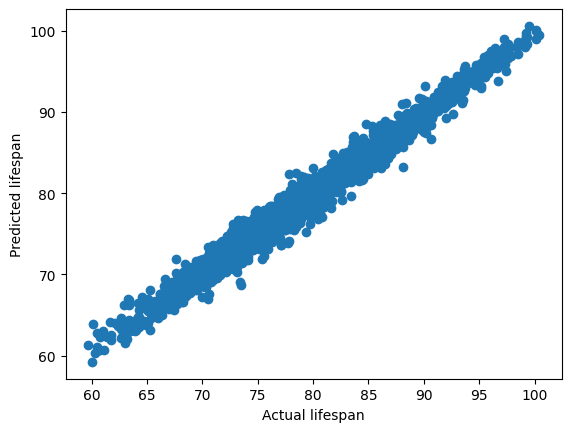

In [28]:
# plot the result
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual lifespan')
plt.ylabel('Predicted lifespan')
plt.show

In [29]:
# score the result
r2_score(y_train, y_pred_train)

0.9798438961460364

In [30]:
# test the data
y_pred_test = lr.predict(x_test)

y_pred_test

array([77.1269527 , 78.50021794, 93.76688864, ..., 63.71799457,
       79.2280516 , 89.28129617])

<function matplotlib.pyplot.show(close=None, block=None)>

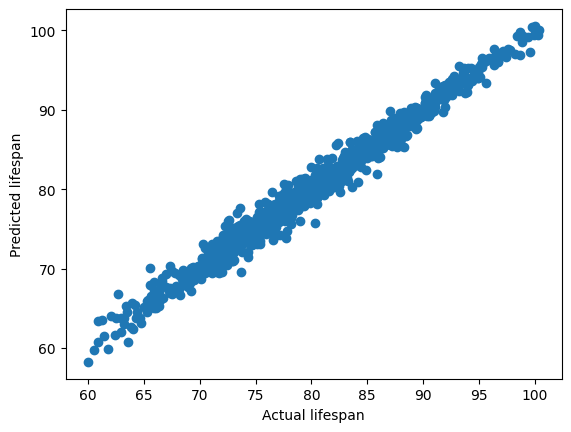

In [31]:
# plot the result
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual lifespan')
plt.ylabel('Predicted lifespan')
plt.show

In [32]:
# score the result
r2_score(y_test, y_pred_test)

0.9791095367737477

In [33]:
lr.feature_names_in_

array(['genetic', 'exercise', 'smoking', 'alcohol', 'sugar', 'bmi'],
      dtype=object)

In [34]:
# genetic = 80
# exercise = 2
# smoking = 0
# alcohol = 1
# sugar = 3
# bmi = 24

new_info = {'genetic': 80, 'exercise': 6, 'smoking': 0, 'alcohol': 1, 'sugar': 2, 'bmi': 20}

new_df = pd.DataFrame(data=new_info,index=[0])

lr.predict(new_df)

array([84.47044586])

In [35]:
def lifespan():
    life_quality = {
        'genetic': input('Enter genetic age')
        ,
        'exercise': input('Enter hours of excercise each day')
        ,
        'smoking': input('Enter amount of sigarettes each day')
        ,
        'alcohol': input('Enter glasses of alcohol each day')
        ,
        'sugar': input('Enter amount of sugarcubes each day')
        ,
        'bmi': input('enter bmi')
    }

    life_quality = pd.DataFrame(data=life_quality, index=[0])

    span = lr.predict(life_quality)
    span = round(span[0], 1)

    print(f'Your predicted age IF nothing changes in your lifestyle is {span} years')

In [36]:
# # genetic = 80
# exercise = 2
# smoking = 0
# alcohol = 1
# sugar = 3
# bmi = 24

lifespan()

Your predicted age IF nothing changes in your lifestyle is 81.0 years


In [ ]:
# to use the model I just trained in my prototype I will save it with pickle